![OMNIS2_Logo_projektu.png](../figures/OMNIS2_Logo_projektu.png)

# Ćwiczenie 9: Tablice dwuwymiarowe

## Wprowadzenie
W tym ćwiczeniu zapoznasz się z tworzeniem i obsługą dwuwymiarowych tablic statycznych, pozwalających przechowywać wiele wartości rozmieszczonych w wierszach i kolumnach, dostępnych pod wspólną nazwą. Dwuwymiarowa organizacja danych jest przydatna w pracy ze zbiorami danych współzależnych, np. argumenty funkcji i osiągane dla nich wartości. W ten sposób można przechowywać np. wyniki pomiarów różnych parametrów dla określonych punktów pomiarowych – każda kolumna przechowuje wartości określonego parametru w danym punkcie. 

## Tablice dwuwymiarowe w C++
**Dwuwymiarowa tablica statyczna**  w C++ składa się z wierszy i kolumn, po których wygodnie można poruszać się parą zagnieżdżonych pętli  *for*. Może być rozpatrywana w pewnym sensie jako tablica tablic jednowymiarowych. Na poniższym rysunku przedstawiono tablicę dwuwymiarową liczb całkowitych o wymiarach *w* x *k*. 

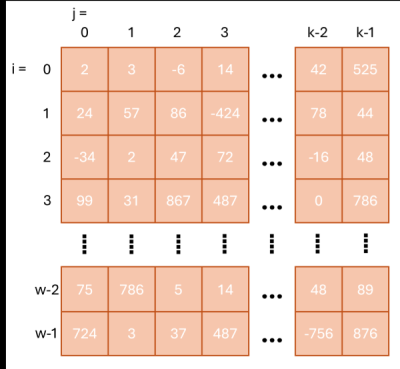

Tablica dwuwymiarowa dzieli liczne podobieństwa z tablicą jednowymiarową omówioną w poprzednim ćwiczeniu:
- Tablica dwuwymiarowa jest zbiorem wielu wartości (elementów) tego samego typu, określonego w definicji tablicy (na rysunku liczby całkowite – typ *int*).
- Wymiary tablicy muszą być opisane stałymi wartościami – **w C++ nie dopuszcza się opisywania wymiarów tablic statycznych za pomocą zmiennych**.
- Każdy element tablicy dwuwymiarowej opisanych jest parą liczb całkowitych nieujemnych (indeksami) określającymi jego położenie w tablicy (podobnie jak w przypadku indeksu elementu w tablicy jednowymiarowej). Na rysunku są to indeksy *i* – wierszowy i *j* – kolumnowy.
- Indeksowanie (numerowanie) wierszy i kolumn zaczyna się od wartości 0, czyli w tablicy o rozmiarze *w* x *k* ostatni element ma współrzędne [w-1][k-1] – nie istnieje element o współrzędnych [w][k].
- Dwuwymiarowa tablica statyczna zajmuje ciągły obszar w pamięci operacyjnej. Wielkość tego obszaru wynika z typu tablicy oraz jej wymiarów (np. tablica 10x20 przechowująca liczby całkowite zajmie $4\cdot10\cdot20 = 800$ B).

## Przygotowanie notatnika

Wykonaj poniższą komórkę, aby przygotować niniejszy notatnik do pracy. W tym ćwiczeniu będziemy posługiwać się manipulatorami wydruku, więc załączony jest również moduł `<iomanip>`. Użyjemy też modułów `<cstdlib>` oraz `<ctime>`do generowania wartości pseudolosowych.

In [ ]:
#include <iostream>
#include <iomanip>
#include <cstdlib>
#include <ctime>
using namespace std;

## Definicja i wypełnienie tablicy dwuwymiarowej
Tablice dwuwymiarowe definiuje się bardzo podobnie do tablic jednowymiarowych. Różnica tkwi w dodaniu drugiej pary nawiasów kwadratowych zawierających wartość drugiego wymiaru tablicy:
```c++
typ_wartości Nazwa_tablicy[wiersze][kolumny];
```
Pierwszy wymiar zawsze określa liczbę wierszy, drugi liczbę kolumn tablicy. Zdefiniuj stałe *w* oraz *k* opisujące wymiary tablicy, a następnie zdefiniuj z ich wykorzystaniem tablicę dwuwymiarową liczb rzeczywistych o nazwie *TAB*:

In [ ]:
// TO DO: zdefiniuj dwie stałe w i k, nadając im wartości całkowite dodatnie
// TO DO: zdefiniuj tablicę licz rzeczywistych o rozmiarach w x k

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
const int w = 5, k = 6;
float TAB[w][k];

##### Na tym etapie Na tym etapie tablica jest niezainicjalizowana. Wykorzystajmy więc parę zagnieżdżonych pętli *for*, aby wypełnić ją liczbami pseudolosowymi z zakresu od -20 do 20 – uzupełnij fragment kodu odpowiadający za losowanie wartości (zwróć uwagę, że losujemy liczby rzeczywiste, a nie całkowite):

In [ ]:
srand(time(0));
for(int i = 0; i < w; i++)
    for(int j = 0; j < k; j++)
        TAB[i][j] = // TO DO: wpisz wyrażenie zwracające pseudolosową wartość rzeczywistą z zakresu od -20 do 20

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
srand(time(0));
for(int i = 0; i < w; i++)
    for(int j = 0; j < k; j++)
        TAB[i][j] = -20 + (20 - (-20))*(rand()/double(RAND_MAX));   

##### Na tym przykładzie widzisz już mechanizm poruszania się po tablicy dwuwymiarowej. Zewnętrzna pętla *for* określa położenie w pionie (wartość indeksu wierszowego) – w którym wierszu się znajdujemy. Działa to poniekąd tak, jakbyśmy wybrali z naszej tablicy dwuwymiarowej pojedynczy wiersz i potraktowali go jak tablicę jednowymiarową, po której poruszamy się wewnętrzną pętlą *for*. Ustala on wartość indeksu kolumnowego, czyli położenie w poziomie.

Tablica dwuwymiarowa jest przechowywana w ciągłym obszarze pamięci. Oznacza to, że najpierw przechowywane są kolejno elementy wiersza 0, potem 1, aż do *w*-1. Z nazwą tablicy jest związany adres początku obszaru zajmowanego przez element o współrzędnych [0][0]. Liczba kolumn *k* określa, ile elementów znajduje się w pojedynczym wierszu. Wobec tego zewnętrzna pętla *for* określa, ile skoków o *k* elementów trzeba wykonać, aby dostać się do interesującego nas wiersza. Wewnętrzna pętla określa, o ile jeszcze elementów trzeba się przesunąć, aby dostać się do interesującego nas elementu. Przykładowo dla elementu o współrzędnych [3][4] w tablicy o wymiarach 6 x 8 trzeba wykonać, względem początku tablicy, trzy skoki o 8 elementów (tyle elementów jest w każdym wierszu). Jesteśmy wtedy na początku wiersza o indeksie 3 i musimy wykonać jeszcze 4 skoki po jednym elemencie, aby dotrzeć do interesującej nas pozycji o współrzędnych [3][4]. Długość elementarnego skoku wynika z rozmiaru danych przechowywanych w tablicy.

## Czytelne wypisanie tablicy dwuwymiarowej
Skoro znamy już mechanizm poruszania się po tablicy, spróbujmy wypisać jej wylosowaną zawartość:

In [ ]:
for(int i = 0; i < w; i++)
    for(int j = 0; j < k; j++)
        cout << TAB[i][j];

Wypisanie tablicy w taki sposób jest zupełnie nieczytelne – otrzymujemy ciąg wartości zlanych w jedną trudną do odczytania całość. Po pierwsze, aby uzyskać efekt wypisania dwuwymiarowego, po wypisaniu każdego wiersza musimy dodać przejście do nowej linii. Po drugie, musimy zapewnić wyraźną separację pomiędzy poszczególnymi pozycjami w wierszu. W przypadku tablic dwuwymiarowych pomocne są manipulatory wydruku. Ustalenie stałej szerokości pola wydruku i, w przypadku liczb zmiennoprzecinkowych, określenie formatu wypisania i stałej precyzji pozwala uzyskać czytelnie wypisaną zawartość tablicy. Uzupełnij i wykonaj poniższy kod, aby czytelnie wypisać tablicę TAB, ustalając szerokość pola wydruku 10, notację dziesiętną i precyzję 3:

In [ ]:
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        // TO DO: wypisz elementy tablicy, wprowadzając do strumienia cout odpowiednie manipulatory wydruku
    // TO DO dodaj przejście do nowej linii po wypisaniu każdego wiersza
}

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        cout << setw(10) << fixed << setprecision(3) << TAB[i][j];
    cout << endl;
}

##### Dane są teraz wypisane w znacznie bardziej przejrzystej formie.

### Zadanie 9.1.
Zdefiniuj statyczną dwuwymiarową tablicę znaków o wymiarach *w* x *k* , gdzie *w*,*k* - wartości stałe. Tablicę wypełnij losowymi małymi literami alfabetu. Wypisz tablicę wierszami (każdy wiersz w nowej linii).

In [ ]:
// TO DO: rozwiąż zadanie

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
srand( time(0));
const int m = 6, n = 8;

char TAB1[m][n];

for(int i = 0; i < m; i++){
    for(int j = 0; j < n; j++){
        TAB1[i][j] = ('a' + rand()%('z'-'a'));
        cout << TAB1[i][j] << '\t';
    }
    cout << endl;
}

##### W tym przypadku nie musieliśmy posłużyć się manipulatorami wydruku dla uzyskania czytelnego efektu – wartość typu char zawsze zajmuje pojedyncze pole, więc można je separować spacją lub tabulatorem. W przypadku liczb całkowitych i rzeczywistych, manipulatory wydruku dają jednak bardziej estetyczny efekt.

## Specyficzne operacje na danych w tablicach dwuwymiarowych
Wiesz już jak zdefiniować, wypełnić i czytelnie wypisać dwuwymiarową tablicę statyczną. Prześledźmy teraz kilka typowych operacji na specyficznych danych w tablicy dwuwymiarowej. 

### Przesunięcia cykliczne
Jedną z typowych operacji na tablicach dwuwymiarowych jest cykliczne przesunięcie wierszy w lewo lub w prawo, albo kolumn w górę lub w dół. Przypomina to znane Ci przesunięcia cykliczne tablic jednowymiarowych – wybrany wiersz lub kolumnę traktujemy jak tablicę jednowymiarową i przesuwamy elementy. W szczególności problem ten może dotyczyć wybranych wierszy lub kolumn, np. parzystych (indeksy 0,2,4,…) lub nieparzystych (indeksy (1,3,5,…). Uzupełnij poniższy przykład, aby przesunąć w prawo nieparzyste wiersze tablicy znaków:

In [ ]:
srand(time(0));
const int w = 8, k = 6;
char TAB[w][k];

// Wypełnienie tablicy znakami z zakresu kodów 33-126 - znaki widzialne oraz wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = (33 + rand()%(126-33+1));
        cout << TAB[i][j] << '\t';
    }
    cout << endl;
}

// Przesunięcie cykliczne
for(/*TO DO: napisz warunek pętli for tak, aby wybrać tylko wiersze parzyste (podpowiedź: zacznij ruch od wiersza 1 i zwiększaj licznink o 2)*/){
    // TO DO: napisz kod realizujący przesunięcie w prawo w i-tym wierszu
}

// Ponowne wypisanie tablicy po modyfikacji
cout << endl << endl;
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        cout << TAB[i][j] << '\t';
    cout << endl;
}

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
srand(time(0));
const int w = 8, k = 6;
char TAB[w][k];

// Wypełnienie tablicy znakami z zakresu kodów 33-126 - znaki widzialne oraz wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = (33 + rand()%(126-33+1));
        cout << TAB[i][j] << '\t';
    }
    cout << endl;
}

// Przesunięcie cykliczne
for(int i = 1; i < w; i+=2){         // zaczynamy od wiersza 1 (nieparzysty) i zwiększami licznik o 2, żeby pominąć wiersze parzyste
    // Przesunięcie cykliczne w prawo jak dla tablicy jednowymiarowej
    char tmp = TAB[i][k-1];
    for(int j = k-1; j > 0; j--)
        TAB[i][j] = TAB[i][j-1];
    TAB[i][0] = tmp;
}

// Ponowne wypisanie tablicy po modyfikacji
cout << endl << endl;
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        cout << TAB[i][j] << '\t';
    cout << endl;
}

##### W podobny sposób realizuje się przesunięcia cykliczne w kolumnach. Wygodnie jest wtedy poruszać się po tablicy kolumnami, a nie wierszami. Przesunięcie kolumny w górę działa podobnie, jak przesunięcie wiersza w lewo (pętla z krokiem inkrementującym i++). Przesunięcie kolumny w dół jest odpowiednikiem przesunięcia wiersza w prawo (pętla z krokiem dekrementującym i--).

### Zadanie 9.2.
Zdefiniuj statyczną dwuwymiarową tablicę znaków o wymiarach *w* x *k* , gdzie *w*,*k* - wartości stałe. Tablicę wypełnij losowymi znakami o kodach ASCII z zakresu 33-126 (znaki widzialne). Wypisz tablicę wierszami. Następnie przesuń cyklicznie w górę parzyste kolumny tablicy i ponownie ją wypisz.

In [ ]:
srand(time(0));
const int w = 8, k = 6;
char TAB[w][k];

// Wypełnienie tablicy znakami z zakresu kodów 33-126 - znaki widzialne oraz wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = (33 + rand()%(126-33+1));
        cout << TAB[i][j] << '\t';
    }
    cout << endl;
}

// Przesunięcie cykliczne
for(int i = 1; i < w; i+=2){         // zaczynamy od wiersza 1 (nieparzysty) i zwiększami licznik o 2, żeby pominąć wiersze parzyste
    // Przesunięcie cykliczne w prawo jak dla tablicy jednowymiarowej
    char tmp = TAB[i][k-1];
    for(int j = k-1; j > 0; j--)
        TAB[i][j] = TAB[i][j-1];
    TAB[i][0] = tmp;
}

// Ponowne wypisanie tablicy po modyfikacji
cout << endl << endl;
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        cout << TAB[i][j] << '\t';
    cout << endl;
}

In [ ]:
// TO DO: rozwiąż zadanie

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
srand(time(0));
const int w = 8, k = 6;
char TAB[w][k];

// Wypełnienie tablicy znakami z zakresu kodów 33-126 - znaki widzialne oraz wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = (33 + rand()%(126-33+1));
        cout << TAB[i][j] << '\t';
    }
    cout << endl;
}

// Przesunięcie cykliczne
for(int j = 0; j < k; j+=2){         // zamieniamy miejscami pętlę wierszową i kolumnową - teraz najpierw ustalamy numer kolumny i dpoiero w niej dokonujemy operacji
                                    // zaczynamy od 0 i zwiększamy licznik o 2, żeby wydzielić klumny parzyste
    // Przesunięcie cykliczne w górę jak przesunięcie w lewo dla tablicy jednowymiarowej
    char tmp = TAB[0][j];
    for(int i = 0; i < w-1; i++)
        TAB[i][j] = TAB[i+1][j];
    TAB[w-1][j] = tmp;
}

// Ponowne wypisanie tablicy po modyfikacji
cout << endl << endl;
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        cout << TAB[i][j] << '\t';
    cout << endl;
}

### Odbicia lustrzane
Tablicę dwuwymiarową można odbić lustrzanie w poziomie lub w pionie. Odbicie w poziomie jest operacją realizowaną na wierszach – każdy kolejny wiersz odbijamy tak, jak robiłeś to w poprzednim ćwiczeniu dla tablicy jednowymiarowej. Odbicie w pionie to operacja realizowana na kolumnach – kolejne kolumny odbijamy tak, jakby były tablicami jednowymiarowymi. Uzupełnij poniższy kod, aby zdefiniować tablicę dwuwymiarową liczb całkowitych, wypełnić ją wartościami dwucyfrowymi dodatnimi, wypisać, następnie odbić w pionie i ponownie wypisać:

In [ ]:
srand(time(0));
const int w = 6, k = 7;
int TAB[w][k];

// Wypełnienie i wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = // TO DO: dopisz wyrażenie zwracające pseudolosową liczbę całkowitą dwucyfrową dodatnią
        // TO DO: dodaj wypisanie z ustaleniem szerokości pola wydruku stosownej do liczby cyfr losowanych liczb
    }
    cout << endl;
}

// Odbicie lustrzane w pionie
for(/*TO DO: przejdź przez tablicę kolumnami*/){
    // TO DO: odbicie w ustalonej kolumnie jak dla tablicy jednowymiarowej
}

// Ponowne wypisanie tablicy po modyfikacji
cout << endl << endl;
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        // TO DO: dodaj wypisanie z ustaleniem szerokości pola wydruku stosownej do liczby cyfr losowanych liczb
    cout << endl;
}

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
srand(time(0));
const int w = 6, k = 7;
int TAB[w][k];

// Wypełnienie i wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = 10 + rand()%(99-10+1);
        cout << setw(6) << TAB[i][j];
    }
    cout << endl;
}

// Odbicie lustrzane w pionie
for(int j = 0; j < k; j++){      // działamy na kolumnach   
    // Odbicie w ustalonej kolumnie jak dla tablicy jednowymiarowej
    for(int i = 0; i < w/2; i++){
        int tmp = TAB[i][j];
        TAB[i][j] = TAB[w-1-i][j];
        TAB[w-1-i][j] = tmp;
    }
}

// Ponowne wypisanie tablicy po modyfikacji
cout << endl << endl;
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        cout << setw(6) << TAB[i][j];
    cout << endl;
}

### Zadanie 9.3.
Zdefiniuj statyczną dwuwymiarową tablicę liczb rzeczywistych o wymiarach *w* x *k*, gdzie *w*,*k* - wartości stałe. Tablicę wypełnij losowymi liczbami z zakresu od 0 do 10. Wypisz czytelnie tablicę wierszami. Następnie odbij w poziomie tablicę i ponownie ją wypisz.

In [ ]:
// TO DO: rozwiąż zadanie

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
srand(time(0));
const int w = 8, k = 5;
float TAB[w][k];

// Wypełnienie i wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = 10 * (rand()/double(RAND_MAX));
        cout << setw(8) << fixed << setprecision(3) << TAB[i][j];
    }
    cout << endl;
}

// Odbicie lustrzane w poziomie
for(int i = 0; i < w; i++){      // działamy na wierszach   
    // Odbicie w ustalonym wierszu jak dla tablicy jednowymiarowej
    for(int j = 0; j < k/2; j++){
        float tmp = TAB[i][j];
        TAB[i][j] = TAB[i][k-1-j];
        TAB[i][k-1-j] = tmp;
    }
}
// Ponowne wypisanie tablicy po modyfikacji
cout << endl << endl;
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++)
        cout << setw(8) << fixed << setprecision(3) << TAB[i][j];
    cout << endl;
}

## Obwód i wnętrze tablicy
Często spotykanym problemem jest poruszanie się po obwodzie lub wnętrzu tablicy. W obszarach tych można dokonywać modyfikacji danych (np. nadpisanie wartości we wnętrzu tablicy) lub wykorzystywać je do obliczeń (np. średnia z liczb na obwodzie tablicy. Na poniższym rysunku kolorem zielonym zaznaczono, co rozumiemy pod pojęciem obwodu tablicy:

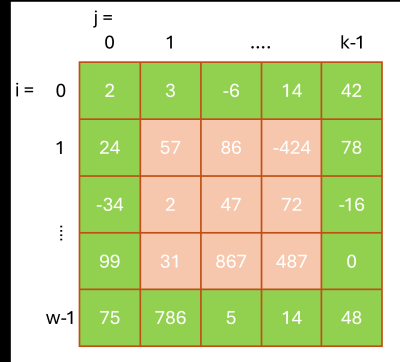

Jak widzisz, jest to obszar nieciągły – pomijamy część wartości w tablicy. Zatem trudno wydzielić ten obszar modyfikując warunki pętli *for*, jak to robiliśmy do tej pory. Możemy jednak wspomóc się instrukcją warunkową *if*. Zauważ, że elementy leżące na obwodzie tablicy przyjmują zawsze jedną ze skrajnych możliwych wartości jednego z indeksów. Mówiąc inaczej, w tablicy o wymiarach *w* x *k* są to elementy dla których: indeks wierszowy wynosi 0 LUB indeks wierszowy wynosi *w*-1 LUB indeks kolumnowy wynosi 0 LUB indeks kolumnowy wynosi *k*-1. Mając tę wiedzę, uzupełnij poniższy kod, aby w tablicy wypełnionej losowymi liczbami całkowitymi od 0 do 100 obliczyć średnią z liczb na obwodzie tablicy:

In [ ]:
srand(time(0));
const int w = 4, k = 5;
int TAB[w][k];

// Wypełnienie i wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = // TO DO: usupełnij wyrażenie losujące liczbę całkowitą z zakresu 0-100
        cout << setw(6) << TAB[i][j];
    }
    cout << endl;
}

// Obliczenie średniej
//TO DO: zdefiniuj zmienne zliczające sumę i liczbę wartości na obwodzie
for(int i = 0; i < w; i++)       // przechodzimy przez całą tablicę - standardowe warunki pętli  
    for(int j = 0; j < k; j++)
        if(/* TO DO: sformułuj warunek, który pozwoli wybrać tylko elementy leżące na obwodzie tablicy */){
            // TO DO: odpowiednio zwiększ zmienną sumującą i licznik
        }

// TO DO: oblicz i wypisz wartość średniej z dokładnością do 3 miejsc dziesiętnych    

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
srand(time(0));
const int w = 4, k = 5;
int TAB[w][k];

// Wypełnienie i wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = rand()%101;
        cout << setw(6) << TAB[i][j];
    }
    cout << endl;
}

// Obliczenie średniej
int suma = 0, licznik = 0;       // zmienne zliczające, przy czym licznik jest opcjonalny - na podstawie wymiarów tablicy można ustalić liczbę elementów na obwodzie bez ich zliczania
for(int i = 0; i < w; i++)       // przechodzimy przez całą tablicę - standardowe warunki pętli  
    for(int j = 0; j < k; j++)
        if(i==0 || i == w-1 || j == 0 || j == k-1){    // wybieramy tylko elementy z obowdu tablicy
            suma += TAB[i][j];
            licznik++;
        }

// Wypisanie obliczonej średniej - pamiętaj o rzutowaniu jednego z argumentów dzielenia
cout << fixed << setprecision(3) <<"Srednia na obwodzie tablicy wynosi: " << double(suma)/licznik << endl;       

##### Przypadek wnętrza tablicy przedstawiono na kolejnym rysunku (zielony obszar). Tu sytuacja jest prostsza, gdyż mamy do czynienia z ciągłym obszarem. Możemy więc zmienić warunki pętli tak, żeby nie zaczynać ruchu od wartości 0 lecz jeden i kończyć nie na *w* i *k* tylko *w*-1 i *k*-1 – w ten sposób pominiemy obwód tablicy. Można też oczywiście użyć instrukcji *if* z zanegowanym warunkiem opisującym obwód, choć jest to mniej optymalne rozwiązanie.

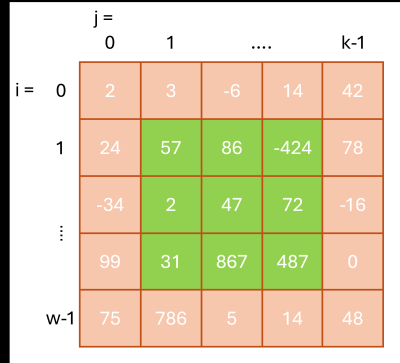

### Zadanie 9.4.
Zdefiniuj statyczną dwuwymiarową tablicę znaków o wymiarach *w* x *k*, gdzie *w*,*k* - wartości stałe. Tablicę wypełnij losowymi znakami o kodach z zakresu 33-126. Wypisz czytelnie tablicę wierszami. Następnie oblicz i wypisz, jaki procent znaków we wnętrzu tablicy stanowią małe litery.


In [ ]:
// TO DO: rozwiąż zadanie

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
srand(time(0));
const int w = 5, k = 8;
char TAB[w][k];

// Wypełnienie tablicy znakami z zakresu kodów 33-126 - znaki widzialne oraz wypisanie tablicy
for(int i = 0; i < w; i++){
    for(int j = 0; j < k; j++){
        TAB[i][j] = (33 + rand()%(126-33+1));
        cout << TAB[i][j] << '\t';
    }
    cout << endl;
}

// Obliczenie procentu małych liter w znakach z wnętrza tablicy
int litery = 0, znaki = 0;
for(int i = 1; i < w-1; i++)
    for(int j = 1; j < k-1; j++){
        if(TAB[i][j] >= 'a' && TAB[i][j] <= 'z')
            litery++;
        znaki++;
    }
cout << endl;
cout << "Procent znakow we wnetrzu tablicy wynosi: " << double(litery)/znaki*100 << '%' <<endl;

## Tablica kwadratowa

Szczególnym przypadkiem tablicy dwuwymiarowej jest **tablica  kwadratowa**, czyli tablica, w której liczba wierszy jest równa liczbie kolumn. Możemy wtedy w uproszczeniu mówić o rozmiarze tablicy, mając na myśli równe sobie liczbę wierszy i liczbę kolumn. Tablica o rozmiarze *n* będzie więc tablicą zawierającą *n* wierszy i *n* kolumn. Definicja i obsługa tablicy kwadratowej wyglądają identycznie, jak każdej innej tablicy dwuwymiarowej:

In [ ]:
srand(time(0));
const int n = 10;      // rozmiar tablicy kwadratowej
int TAB[n][n];         // definicja tablicy kwadratowej

// Wypełnienie i wypisanie tablicy kwadratowej
for(int i = 0; i < n; i++){
    for(int j = 0; j < n; j++){
        TAB[i][j] = -50+rand()%101;      // wypełnienie liczbami z zakresu od -50 do 50
        cout << setw(5) << TAB[i][j];
    }
    cout << endl;
}

Z tablicą kwadratową wiążą się specyficzne obszary wyznaczane przez jej przekątne. Na poniższym rysunku kolorem niebieskim oznaczono elementy na **głównej przekątnej tablicy kwadratowej**, zaś kolorem czerwonym elementy na *drugiej przekątnej**. Kolorem fioletowym oznaczono element wspólny, który istnieje tylko w tablicach kwadratowych o nieparzystym rozmiarze.

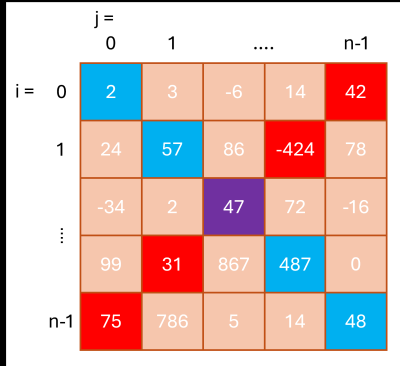

Jeśli przyjrzysz się rysunkowi, zauważysz, że dla elementów na poszczególnych przekątnych indeksy wierszowy i kolumnowy pozostają w ściśle określonych relacjach. Dla głównej przekątnej indeksy są sobie równe: *i* = *j*, zaś dla drugiej przekątnej zachodzi zależność opisana relacją *j* = *n*-*i*-1. Przez obie przekątne można przejść, używając zaledwie pojedynczej pętli *for*.  Wypiszmy zawartość obu przekątnych wypełnionej wcześniej tablicy:

In [ ]:
cout << "Glowna przekatna:" << endl;
for(int i = 0; i < n; i++)
    cout << setw(5) << TAB[i][i];

cout << endl;
cout << "Droga przekatna:" << endl;
for(int i = 0; i < n; i++)
    cout << setw(5) << TAB[i][n-i-1];

Przekątne wyznaczają pewne obszary, w których można dokonywać modyfikacji danych lub wykorzystywać dane do obliczeń, np. średnia z liczb nad/pod główną/drugą przekątną. W takiej sytuacji sformułowane powyżej równania opisujące relację indeksów przyjmują formę nierówności. Mając do czynienia z obszarami ograniczonymi przekątnymi, najefektywniej jest modyfikować zakres zmienności indeksów w pętli tak, by ograniczyć je do konkretnego obszaru. Uzupełnij poniższy kod, aby wypisać obszar nad drugą przekątną utworzonej wcześniej tablicy *TAB*:

In [ ]:
for(int i = 0; i < n; i++){
    for(/* TO DO: napisz warunek pętli ograniczający zakres indeksu j do wartości od 0 do pozycji elementu na drugiej przekątnej w danym wierszu - wartość j będzie zależna od i */)
        cout << setw(5) << TAB[i][j];
    cout << endl;
}

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
for(int i = 0; i < n; i++){
    for(int j = 0; j < n-i-1; j++)
        cout << setw(5) << TAB[i][j];
    cout << endl;
}

##### Spróbuj teraz zmienić warunki pętli, aby wypisać pozostałe obszary: nad główną przekątną, pod główną przekątną i pod drugą przekątną.

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
cout << "Nad glowna przekatna:" << endl;
for(int i = 0; i < n; i++){
    for(int j = i+1; j < n; j++)
        cout << setw(5) << TAB[i][j];
    cout << endl;
}
cout << endl;

cout << "Pod glowna przekatna:" << endl;
for(int i = 0; i < n; i++){
    for(int j = 0; j < i; j++)
        cout << setw(5) << TAB[i][j];
    cout << endl;
}
cout << endl;

cout << "Pod droga przekatna:" << endl;
for(int i = 0; i < n; i++){
    for(int j = n-i; j < n; j++)
        cout << setw(5) << TAB[i][j];
    cout << endl;
}
cout << endl;

### Zadanie 9.5.
Zdefiniuj statyczną tablicę kwadratową znaków o rozmiarze *n* gdzie *n* - wartość stała. Tablicę wypełnij losowymi znakami o kodach z zakresu 33-126. Wypisz czytelnie tablicę wierszami. Oblicz, jaki procent znaków na głównej przekątnej stanowią wielkie litery. Jeśli procent jest większy, niż 10, wypełnij obszar pod drugą przekątną losowymi cyframi. Wypisz ponownie tablicę po modyfikacji.

In [ ]:
// TO DO: rozwiąż zadanie

In [ ]:
#include <iostream>
#include <iomanip>
#include <cstdlib>
#include <ctime>
using namespace std;

srand(time(0));
const int n = 8;
char TAB[n][n];

// Wypełnienie i wypisanie tablicy kwadratowej
for(int i = 0; i < n; i++){
    for(int j = 0; j < n; j++){
        TAB[i][j] = 33+rand()%(126-33+1);
        cout << TAB[i][j] << '\t';
    }
    cout << endl;
}
cout << endl;

// Obliczenie procentu wielkich liter na głównej przekątnej
int litery = 0;
for(int i = 0; i < n; i++)
    if(TAB[i][i] >= 'A' && TAB[i][i] <= 'Z')
        litery++;
float procent = 100*float(litery)/n;     // liczba znaków na przekątnej jest równa rozmiarowi tablicy
cout << "Procent wielkich liter na glownej przekatnej: " << procent << '%' << endl << endl;

// Modyfikacja tablicy
if(procent > 10)
    for(int i = 0; i < n; i++)
        for(int j = n-i; j < n; j++)
            TAB[i][j] = '0'+rand()%('9'-'0'+1);

// Ponowne wypisanie
for(int i = 0; i < n; i++){
    for(int j = 0; j < n; j++){
        cout << TAB[i][j] << '\t';
    }
    cout << endl;
}

##### To już wszystkie najważniejsze zagadnienia związane ze statycznymi tablicami dwuwymiarowymi. Poniżej znajdziesz zadania do samodzielnego rozwiązania, które pozwolą przećwiczyć zdobyte umiejętności.

## Zadania do samodzielnego rozwiązania

### Zadanie 9.6.
Zdefiniować kwadratową tablicę statyczną liczb całkowitych o rozmiarze NxN, gdzie N - wartość stała.

1. Tablicę wypełnić losowymi liczbami całkowitymi z przedziału pobranego z konsoli. Wymusić prawidłowe granice losowania.
2. Wydrukować tablicę wierszami (każdy wiersz w nowej linii).
3. Wyznaczyć średnią z wartości na obwodzie tablicy.
4. Przesunąć cyklicznie w prawo o 1 miejsce wszystkie parzyste wiersze.
5. Wydrukować tablicę wierszami (każdy wiersz w nowej linii).

In [ ]:
// TO DO: rozwiąż zadanie

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
#include <iostream>
#include <iomanip>
#include <cstdlib>
#include <ctime>
using namespace std;

srand(time(0));
    
const int N=4;
int tab[N][N];

//Ad. 1:
int a1, a2;
do{
    cout << "podaj przedzial lczb do losowania:" << endl;
    cin >> a1 >> a2;
}while(a2 < a1);

for(int i=0;i<N;i++){
    for(int j=0;j<N;j++){
        tab[i][j] = a1 + rand()%(a2-a1+1);
    }
}

//Ad. 2:
cout << "tablica:" << endl;
for(int i=0;i<N;i++){
    for(int j=0;j<N;j++){
        cout << tab[i][j] << "\t";
    }
    cout << endl;
}

//Ad. 3:
int suma=0, licznik=0;
for(int i=0;i<N;i++){
    for(int j=0;j<N;j++){
        if(i==0 ||j==0 || i==N-1 || j==N-1){
            suma+=tab[i][j];
            licznik++;
        }
    }
}
cout << "średnia liczb na obwodzie: " << float(suma)/licznik << endl;

//Ad. 4:
for(int i=0;i<N;i++){
    if(i%2!=0){
        int pom = tab[i][N-1];
        for(int j=N-1;j>0;j--){
            tab[i][j]=tab[i][j-1];
        }
        tab[i][0]= pom;
    }
}

//Ad. 5:
cout << "tablica z przesunietymi wierszami parzystymi o 1 w prawo:" << endl;
for(int i=0;i<N;i++){
    for(int j=0;j<N;j++){
        cout << tab [i][j]<< "\t";
    }
    cout << endl;
}

### Zadanie 9.7.
Zdefiniować kwadratową tablicę statyczną  liczb rzeczywistycho rozmiarze NxN, gdzie N - wartość stała.

1. Tablicę wypełnić losowymi liczbami rzeczywistymi z przedziału pobranego z konsoli. Wymusić prawidłowe granice losowania.
2. Wydrukować tablicę wierszami (każdy wiersz w nowej linii).
3. Wyznaczyć największą i najmniejszą wartość na głównej przekątnej tablicy.
4. Wyznaczyć średnią wartość na II przekątnej tablicy.
5. Wydrukować tablicę wierszami (każdy wiersz w nowej linii).

In [ ]:
// TO DO: rozwiąż zadanie

##### Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie:

In [ ]:
//przykład poprawnego rozwiązania:
#include <iostream>
#include <iomanip>
#include <cstdlib>
#include <ctime>
using namespace std;


float m, k;
const int N = 4;
float tab[N][N];
double suma = 0;
int ilosc = 0;
double srednia = 0;
double najmniejsza,  najwieksza;

do{
    cout << "podaj zakres liczb" << endl;
    cin >> m >> k;
}while(m > k);

cout<<"tablica"<<endl;

srand(time(NULL));

for(int i = 0; i<N; i++){

    for(int j = 0; j < N; j++){

        tab[i][j]= m + (k - m )*rand()/float(RAND_MAX);

    }

}

for(int i = 0; i < N; i++){

    for(int j = 0; j < N; j++){

        cout<< stew (8) << fixed << setprecision(3) << tab[i][j];
    }
    cout<<endl;
}

cout << endl;
cout << "przejscie po przekatnej" << endl;

// sposób 1

najmniejsza = tab[0][0];
najwieksza = tab[0][0];

    for(int i = 0; i < N; i++){

    for(int j = 0; j < N; j++){

        if(i == j){

            if(tab[i][j] < najmniejsza){
                najmniejsza = tab[i][j];
            }
            if(tab[i][j] > najwieksza){
                najwieksza = tab[i][j];
            }

        }
    }
}

// // sposób 2
// for(int i=0;i<n;i++)
// {
//     if(i==0)
//     {
//         najwieksza=tab[i][i];
//         najmniejsza=tab[i][i];
//     }
//     if(tab[i][i]>najwieksza)
//     {
//         najwieksza=tab[i][i];
//     }
//     if(tab[i][i]<najmniejsza)
//     {
//         najmniejsza=tab[i][i];
//     }
// }

for(int i = 0; i < N; i++){

    for(int j = 0; j < N; j++){

        if(i == j){

        cout<< tab[i][j]<<"\t";
        }
        else{
            cout << "\t";
        }
    }
    cout<<endl;
}

cout << endl;
cout << "najmniejsza wartosc po przekatnej " << najmniejsza << endl;
cout << "najwieksza wartosc po przekatnej " << najwieksza << endl;
cout << endl;
cout << "przejscie po drugiej przekatnej" << endl;

//sposób 1
for(int i = 0; i < N; i++){

    for(int j = 0; j < N; j++){

        if(N - 1 - i == j) {

            suma +=  tab[i][j];
            ilosc ++;
        }
    }
}

srednia = suma/ ilosc;
cout << "srednia po drugiej przekatnej " << srednia << endl;

// //sposób 2
// for(int i=0;i<n;i++)
// {
//         suma=tab[i][N-i-1]+suma;
// }

// cout << "srednia po drugiej przekatnej " << suma/N << endl;

for(int i = 0; i < N; i++){

    for(int j = 0; j < N; j++){

        if(N - 1 - i == j){

            cout <<  tab[i][j]<< "\t";
        }
        else{
            cout << "\t";
        }
    }
    cout << endl;
}

cout << endl;

# 

![logotypy.png](../figures/OMNIS2_logotypy.png)